In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy import stats

In [2]:
x=pd.read_csv('../../_xlable4_withNa_AllColumns.txt')
y=pd.read_csv('../../_targelable4_withNa_AllColumns.txt')

y=y[['Unnamed: 0','L100200', ]]

In [3]:
data= pd.merge(x,y, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data['max']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7'])

In [4]:
# filter the data set 
data=data[data.FIELD_16!=1] # exclude people who are diagnosed for (diabetes) 
data=data[data.FIELD_23!=1] # exclude people who are on medication for diabetes

data=data[data.FIELD_15!=1] # exclude people who are diagnosed for (high blood pressure)
data=data[data.FIELD_22!=1] # exclude people who are on medication for high blood pressure

data=data[data.FIELD_17!=1] # exclude people who are diagnosed for hyperlipidemia
data=data[data.FIELD_24!=1] # exclude people who are on medication for hyperlipidemia

print(data.shape)

(159381, 408)


In [5]:
#split column types to categorical and numerical
numerical_cols = list(data.columns[~data.columns.str.startswith('FIELD')])
categorical_cols = list(data.columns[data.columns.str.startswith('FIELD')])

Calculate correlation Value - for numerical values
========

In [6]:
corr=data[numerical_cols].corr()
corr=corr.L100200_y
corrvalPD=pd.DataFrame()
corrvalPD['Col']=corr.index
corrvalPD['val']=abs(corr.values)

corrvalPD=corrvalPD.sort_values(by='val',ascending=False)
corrvalPD.head()

,Col,val
262,S004418,1.0
278,L100200_y,1.0
261,S004417,1.0
260,S004416,1.0
134,L393800,1.0


In [7]:
#count of none NA values of feature set
mydataset=data.copy()[numerical_cols]
colCount=[]
for i in mydataset.columns:
    colCount.append([i,mydataset[i].dropna().shape[0]])

colCountPD=pd.DataFrame(colCount,columns=['Col','Count'])
colCountPD.head()

,Col,Count
0,Unnamed: 0,159381
1,index,159381
2,COMPARE,159381
3,AGE,159381
4,B_DAY,159381


In [8]:
mergedColCorrCount=pd.merge(corrvalPD,colCountPD,how='inner',left_on='Col',right_on='Col')
mergedColCorrCount=mergedColCorrCount[mergedColCorrCount.Count>50000]
mergedColCorrCount=mergedColCorrCount.sort_values(by='val', ascending=False)
mergedColCorrCount.head(20)

,Col,val,Count
1,L100200_y,1.000000,151272
19,L100200_x,0.415869,148627
31,L107500,0.240795,142725
33,SEX,0.220743,159381
35,L190400,0.213915,159241
36,L103800,0.206420,66480
37,L190300,0.206074,159204
39,S000100,0.200149,159302
40,L190500,0.200144,159204
41,L100700,0.193329,152474


In [9]:
print(list(mergedColCorrCount.head(15).Col))

['L100200_y', 'L100200_x', 'L107500', 'SEX', 'L190400', 'L103800', 'L190300', 'S000100', 'L190500', 'L100700', 'B_DAY', 'AGE', 'L100300', 'L100100', 'L100500']


Anova test - For categorical values [Questionnaire answers]
=======

In [10]:
mydataset=data.copy()[categorical_cols] #[np.insert(categorical_cols,0,'L100800')]


mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
                                  'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
                                 'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
                                 'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
                                 'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
                                  'FIELD_137','FIELD_138','FIELD_139','FIELD_140',
                                  'FIELD_64','FIELD_65','FIELD_66','FIELD_67','FIELD_68','FIELD_69','FIELD_70','FIELD_72',
                                  'FIELD_73','FIELD_74','FIELD_75','FIELD_76','FIELD_77','FIELD_80','FIELD_81','FIELD_84',
                                  'FIELD_85','FIELD_90','FIELD_93','FIELD_94','FIELD_95','FIELD_96','FIELD_97','FIELD_98',
                                  'FIELD_101','FIELD_102','FIELD_105','FIELD_106','FIELD_112','FIELD_113','FIELD_114',
                                  'FIELD_115','FIELD_116','FIELD_117','FIELD_118','FIELD_119','FIELD_9'
                                 ])


mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='`'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='G'].index)


mydataset=mydataset.drop(mydataset[mydataset.FIELD_4=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_5=='.'].index)

mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='?'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_36=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_37=='\\'].index)
 
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '7+' ].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '5~7'].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '3-4'].index)


# mydataset=mydataset.drop(mydataset[mydataset.FIELD_95=='.'].index)

In [11]:
colslist=mydataset.columns
DiabeticColVals=data.L100200_y

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]].astype(float)
    temp=temp.dropna()
    count.append(temp.shape[0])
    
    uniquevalues=temp.b.unique()
    
    selectedGroupVals=[]
    for k in range(len(uniquevalues)):
        selectedGroupVals.append(np.asarray(temp[temp['b']==uniquevalues[k]].a))

    F, p = stats.f_oneway(*selectedGroupVals)
    cor.append(F)
    pval.append(p)
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_13
4 FIELD_14
5 FIELD_15
6 FIELD_16
7 FIELD_17
8 FIELD_18
9 FIELD_19
10 FIELD_20
11 FIELD_21
12 FIELD_22
13 FIELD_23
14 FIELD_24
15 FIELD_25
16 FIELD_26
17 FIELD_27
18 FIELD_28
19 FIELD_29
20 FIELD_30
21 FIELD_31
22 FIELD_32
23 FIELD_33
24 FIELD_34
25 FIELD_35
26 FIELD_36
27 FIELD_37
28 FIELD_38
29 FIELD_40
30 FIELD_41
31 FIELD_42
32 FIELD_43
33 FIELD_44
34 FIELD_45
35 FIELD_46
36 FIELD_47
37 FIELD_48
38 FIELD_49
39 FIELD_50
40 FIELD_51
41 FIELD_52
42 FIELD_53
43 FIELD_54
44 FIELD_55
45 FIELD_56
46 FIELD_57
47 FIELD_58
48 FIELD_59
49 FIELD_60
50 FIELD_61
51 FIELD_62
52 FIELD_63


In [12]:
FvalPvalCorr=pd.DataFrame()    
FvalPvalCorr['Cols']=colslist
FvalPvalCorr['F']=cor
FvalPvalCorr['P']=pval
FvalPvalCorr['Count']=count
FvalPvalCorr=FvalPvalCorr.sort_values(by='F', ascending=False)


In [13]:
FvalPvalCorr[FvalPvalCorr.Count>50000].head(10)

,Cols,F,P,Count
23,FIELD_33,369.850114,0.000000e+00,150972
28,FIELD_38,316.827804,0.000000e+00,150980
8,FIELD_18,192.505343,9.601557e-44,151254
15,FIELD_25,157.043055,5.219846e-36,151255
17,FIELD_27,109.623513,1.209062e-25,151254
18,FIELD_28,37.385311,9.718565e-10,151255
31,FIELD_42,36.086027,1.198599e-57,150942
22,FIELD_32,32.019398,9.460647e-45,150784
1,FIELD_4,23.994306,7.064794e-33,148952
29,FIELD_40,21.863474,9.654516e-30,150989


In [14]:
print(list(FvalPvalCorr[FvalPvalCorr.Count>50000].Cols)[:10])

['FIELD_33', 'FIELD_38', 'FIELD_18', 'FIELD_25', 'FIELD_27', 'FIELD_28', 'FIELD_42', 'FIELD_32', 'FIELD_4', 'FIELD_40']


========================= LASSO method
================

In [17]:
selectedcols=['L100200_y', 'L100200_x', 'L107500', 'SEX', 'L190400', 'L103800', 'L190300', 'S000100', 'L190500', 
              'L100700', 'B_DAY', 'AGE', 'L100300', 'L100100', 'L100500','FIELD_33', 'FIELD_38', 'FIELD_18', 
              'FIELD_25', 'FIELD_27', 'FIELD_28', 'FIELD_42', 'FIELD_32', 'FIELD_4', 'FIELD_40'
             ]
data2=data[selectedcols].copy().dropna()
print(data2.shape)

(63935, 25)


In [18]:
x=data2[['L100200_x', 'L107500', 'SEX', 'L190400', 'L103800', 'L190300', 'S000100', 'L190500', 
              'L100700', 'B_DAY', 'AGE', 'L100300', 'L100100', 'L100500','FIELD_33', 'FIELD_38', 'FIELD_18', 
              'FIELD_25', 'FIELD_27', 'FIELD_28', 'FIELD_42', 'FIELD_32', 'FIELD_4', 'FIELD_40']]
y=data2.L100200_y

In [19]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

print(clf.coef_)

print(clf.intercept_)  

# pd.DataFrame([x.columns.ravel(),clf.coef_.ravel()],columns=['Name','coeff'])

lassod=pd.DataFrame()
lassod['Name']=x.columns
lassod['coeff']=clf.coef_
lassod

lassod=lassod.drop(lassod[lassod.coeff==0].index)
lassod.coeff=abs(lassod.coeff)
lassod=lassod.sort_values(by='coeff', ascending=False)
lassod

[ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.87906108e-03  4.94130018e-03
  0.00000000e+00  5.15695975e-07  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00]
3.431259482755965


,Name,coeff
7,L190500,4.941300e-03
6,S000100,2.879061e-03
9,B_DAY,5.156960e-07


In [20]:
print(list(lassod.Name[:16]))

['L190500', 'S000100', 'B_DAY']


=============================== SelectKBest method
========================

In [21]:
# from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# x=x[x.columns[:15]]
print(list(x.columns[:12]))

['L100200_x', 'L107500', 'SEX', 'L190400', 'L103800', 'L190300', 'S000100', 'L190500', 'L100700', 'B_DAY', 'AGE', 'L100300']


========================================= LinearSVC
===============

In [22]:
# from sklearn.svm import LinearSVC
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectFromModel

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(x)
# X_new.shape

In [23]:
# X_new

================================ SequentialFeatureSelector 
================================

In [24]:
# from sklearn.linear_model import LinearRegression
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from sklearn.ensemble import RandomForestRegressor

# lr = RandomForestRegressor()

# sfs = SFS(lr, 
#           k_features=13, 
#           forward=True, 
#           floating=False, 
#           scoring='neg_mean_squared_error',
#           cv=5)

# sfs = sfs.fit(x, y)
# fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

# plt.title('Sequential Forward Selection (w. StdErr)')
# plt.grid()
# plt.show()

================================= feature_importances
=====

[0.13213783 0.049805   0.04016577 0.0442957  0.05107956 0.047585
 0.05198586 0.04539072 0.05160695 0.06278832 0.05326161 0.03315816
 0.03668806 0.04444319 0.02394163 0.04194967 0.00623702 0.00469478
 0.01091951 0.01070768 0.04537644 0.03255343 0.03889813 0.04032999]


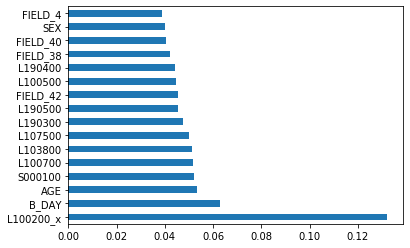

L100200_x    0.132138
B_DAY        0.062788
AGE          0.053262
S000100      0.051986
L100700      0.051607
L103800      0.051080
L107500      0.049805
L190300      0.047585
L190500      0.045391
FIELD_42     0.045376
L100500      0.044443
L190400      0.044296
FIELD_38     0.041950
dtype: float64
Index(['L100200_x', 'B_DAY', 'AGE', 'S000100', 'L100700', 'L103800', 'L107500',
       'L190300', 'L190500', 'FIELD_42', 'L100500', 'L190400', 'FIELD_38'],
      dtype='object')


In [29]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

print(feat_importances.nlargest(13))
print(feat_importances.nlargest(13).index)

In [26]:
# this function computes vif value which help us to remove columns with redundant information ( to avoid Multicollinearity)
# Multicollinearity occurs when two or more predictors in the model are correlated and provide redundant information about the response.
# Multicollinearity was measured by variance inflation factors (VIF) and tolerance


def vifcal(inputdata, depcol):
    vifL5 = []
    import statsmodels.formula.api as sm

    xvars = inputdata.drop([depcol], axis=1)
    xvarnames = xvars.columns
    for i in range(0, xvarnames.shape[0]):
        _y = xvars[xvarnames[i]]
        _x = xvars[xvarnames.drop(xvarnames[i])]
        rsq = sm.ols(formula="_y~_x", data=xvars).fit().rsquared
        vif = round(1 / (1 - rsq), 2)
        print(i, ", ", xvarnames[i], " VIF = ", vif)
        if vif < 5:
            vifL5.append(xvarnames[i])
    return vifL5

In [30]:

newcols = vifcal(
    data2[
        ['L100200_x', 'AGE', 'S000100', 'L100700', 'L103800', 'L107500',
       'L190300', 'L190500', 'FIELD_42', 'L100500', 'L190400', 'FIELD_38','L100200_y'
        ]
    ],
    "L100200_y",
)
print(newcols, len(newcols))

0 ,  L100200_x  VIF =  1.64
1 ,  AGE  VIF =  1.16
2 ,  S000100  VIF =  1.8
3 ,  L100700  VIF =  1.83
4 ,  L103800  VIF =  1.42
5 ,  L107500  VIF =  1.16
6 ,  L190300  VIF =  4.88
7 ,  L190500  VIF =  20.44
8 ,  FIELD_42  VIF =  1.01
9 ,  L100500  VIF =  1.92
10 ,  L190400  VIF =  16.01
11 ,  FIELD_38  VIF =  1.17
['L100200_x', 'AGE', 'S000100', 'L100700', 'L103800', 'L107500', 'L190300', 'FIELD_42', 'L100500', 'FIELD_38'] 10


============================= Backward Elimination
========

In [ ]:
import statsmodels.regression.linear_model as sm
temp=x.copy()
temp['const']=np.ones((x.shape[0],1))
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

In [ ]:
temp=temp.drop(columns=['L103000','L103300','L190300','FIELD_40','FIELD_27','FIELD_29','FIELD_21','FIELD_5','FIELD_14'])
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

In [ ]:
temp=temp.drop(columns=['FIELD_33'])
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

In [ ]:
temp.columns